<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/13_10_Batch_Normalization_in_Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding batch normalization layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [15]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/*jpg |wc -l

2352


In [14]:
# reading the csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [5]:
# create random number generator
seed = 42

In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [7]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [8]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [9]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [10]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Without Batch Normalization</ol>

In [12]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Compiling the model

In [18]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [15]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [16]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 9s 473ms/step - loss: 0.6683 - accuracy: 0.5923 - val_loss: 0.6520 - val_accuracy: 0.6643
Epoch 2/50
13/13 [==============================] - 1s 120ms/step - loss: 0.6412 - accuracy: 0.6586 - val_loss: 0.6502 - val_accuracy: 0.5992
Epoch 3/50
13/13 [==============================] - 1s 114ms/step - loss: 0.6253 - accuracy: 0.6616 - val_loss: 0.6257 - val_accuracy: 0.6615
Epoch 4/50
13/13 [==============================] - 1s 96ms/step - loss: 0.6183 - accuracy: 0.6665 - val_loss: 0.6098 - val_accuracy: 0.6884
Epoch 5/50
13/13 [==============================] - 1s 90ms/step - loss: 0.6018 - accuracy: 0.6944 - val_loss: 0.6071 - val_accuracy: 0.6686
Epoch 6/50
13/13 [==============================] - 1s 111ms/step - loss: 0.5971 - accuracy: 0.7084 - val_loss: 0.6105 - val_accuracy: 0.6629
Epoch 7/50
13/13 [==============================] - 1s 98ms/step - loss: 0.5893 - accuracy: 0.7047 - val_loss: 0.6013 - val_accuracy: 0.6756
Epoch 8/5

## 7. Evaluating model performance

In [17]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 [==============================] - 1s 22ms/step


In [18]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.7110481586402266 %


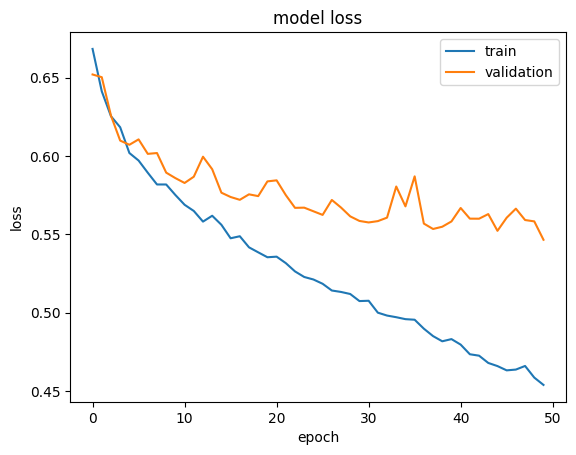

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Defining the model architecture

### <ol>With Batch Normalization</ol>

In [11]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [17]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063501 (57.46 MB)
Trainable params: 15063301 (57.46 MB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


## Compiling the model

In [19]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## Training the model

In [20]:
# training the model for 50 epochs using Batch Normalization
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 5s 158ms/step - loss: 0.6923 - accuracy: 0.6312 - val_loss: 0.7482 - val_accuracy: 0.4391
Epoch 2/50
13/13 [==============================] - 1s 51ms/step - loss: 0.5391 - accuracy: 0.7242 - val_loss: 0.7328 - val_accuracy: 0.4391
Epoch 3/50
13/13 [==============================] - 1s 50ms/step - loss: 0.4784 - accuracy: 0.7825 - val_loss: 0.7264 - val_accuracy: 0.4391
Epoch 4/50
13/13 [==============================] - 1s 50ms/step - loss: 0.4159 - accuracy: 0.8244 - val_loss: 0.7165 - val_accuracy: 0.4391
Epoch 5/50
13/13 [==============================] - 1s 53ms/step - loss: 0.3684 - accuracy: 0.8554 - val_loss: 0.7160 - val_accuracy: 0.4391
Epoch 6/50
13/13 [==============================] - 1s 50ms/step - loss: 0.3280 - accuracy: 0.8761 - val_loss: 0.7102 - val_accuracy: 0.4391
Epoch 7/50
13/13 [==============================] - 1s 52ms/step - loss: 0.2863 - accuracy: 0.9113 - val_loss: 0.6895 - val_accuracy: 0.4504
Epoch 8/50
1

## Evaluating model performance

In [21]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 [==============================] - 0s 8ms/step


In [22]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.726628895184136 %


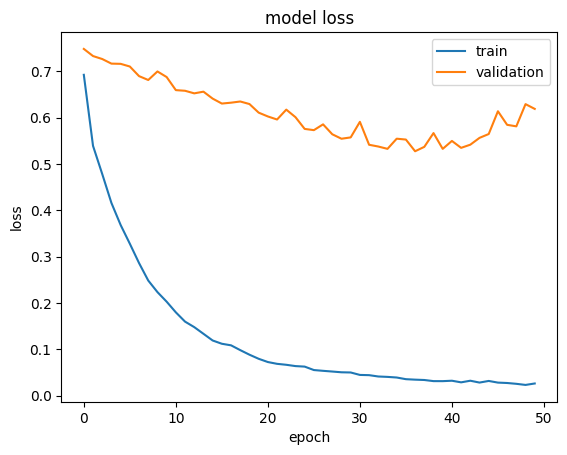

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()